## Layers: the building blocks of deep learning

In [76]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

from keras.datasets import imdb
from keras.datasets import reuters
from keras.datasets import boston_housing

from keras.utils import to_categorical

import copy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Örnek nöral ağ modeli, sadece ilk layerda input_shape belirtmemiz gerekir sonrasında keras diğer işlemleri kendi başına halledebiliyor.
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

In [4]:
# Aynı modelin 2 farklı şekilde yazılması

model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(784,)))
model.add(layers.Dense(10, activation="softmax"))

# Yukarıdaki kod ile aşağıdaki tamamen aynıdır aşağıdaki functional API kullanılarak yazılmıştır.
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation="relu")(input_tensor)
output_tensor = layers.Dense(10, activation="softmax")(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

With the functional API, you're manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions

In [ ]:
# Optimizer, loss, metric
# from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss="mse",
              metrics=["accuracy"])

# The learning process consist of passing Numpy arrays of input data to the model
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## Classifying movie reviews: a binary classification example

IMDB dataset

In [7]:
# Loading the IMDB dataset
# from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words means you'll only keep the top 10.000 most frequently occurring words in the training data

17464789/17464789 [==============================] - 0s 0us/step


In [9]:
print(train_data[0])
train_labels[0] # for labels, 0 mean negative 1 mean positive

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

In [10]:
# num_words=10.000 olduğu için en büyük değer 9999 geldi
max([max(sequence) for sequence in train_data])

9999

In [12]:
# Decode one of these reviews

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# i-3 because 0,1,2 are reserved indices for "padding" "start of sequence" "unknown"
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

In [14]:
# Encoding the integer sequences into a binary matrix
# import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [23]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Building your network

In [ ]:
# Input data is vectors, and the labels are scalars(1s and 0s)
# The model definition

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


"""model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])"""

# from keras import losses
# from keras import metrics
"""model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])"""

In [27]:
# Validating your approach
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training your model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 120ms/step - loss: 0.5533 - acc: 0.7689 - val_loss: 0.4276 - val_acc: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3507 - acc: 0.8891 - val_loss: 0.3266 - val_acc: 0.8817
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2604 - acc: 0.9141 - val_loss: 0.3076 - val_acc: 0.8756
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2086 - acc: 0.9314 - val_loss: 0.2766 - val_acc: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1767 - acc: 0.9413 - val_loss: 0.2750 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1504 - acc: 0.9513 - val_loss: 0.3196 - val_acc: 0.8720
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1307 - acc: 0.9580 - val_loss: 0.2961 - val_acc: 0.8810
Epoch 8/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1143 - 

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

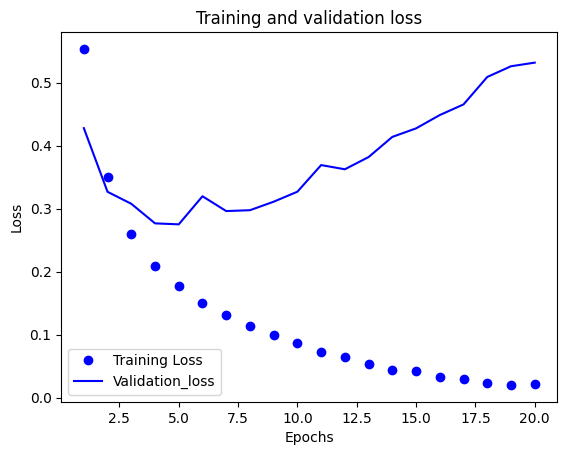

In [31]:
# Plotting the training and validation loss
# import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(history_dict["acc"]) + 1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation_loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

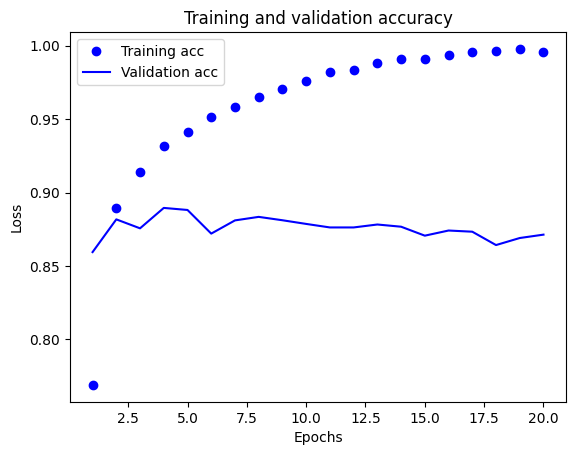

In [33]:
# Plotting the training and validation accuracy
plt.clf() # clears the figure
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Train loss ve accuracy pozitif olmasına rağmen validation kısmında 3-4 epochs sonra saçmalamalar başlıyor bu overfitting anlamına gelir.

Farklı bir model deneyelim.

In [35]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4752 - accuracy: 0.8060
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2817 - accuracy: 0.9021
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2200 - accuracy: 0.9228
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2828 - accuracy: 0.8881


In [36]:
results

[0.2828041911125183, 0.8881199955940247]

In [37]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.24308023],
       [0.99997556],
       [0.7932038 ],
       ...,
       [0.12224413],
       [0.09694915],
       [0.62646246]], dtype=float32)

## Classifying newswires: a multiclass classification example

The Reuters dataset

In [39]:
# Loading the Reuters dataset
# from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [40]:
len(train_data), len(test_data)

(8982, 2246)

In [41]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [47]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [48]:
train_labels[0]

3

### Preparing the data

In [58]:
# Encoding the data

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

"""
def to_one_hot(labels, dimension=64):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
"""


# Built-in way
# from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building your network

In [53]:
# Bu verisetinde 46 farklı sınıf olduğu için önceki model küçük gelecektir ve aynı şekilde output layer da sınıf sayısına bağlı şekilde değişecek

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax")) # Her sample, 46-dimensional vector verecek

In [59]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Validating your approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 2.6599 - accuracy: 0.5122 - val_loss: 1.8006 - val_accuracy: 0.6210
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5149 - accuracy: 0.6883 - val_loss: 1.3661 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.1771 - accuracy: 0.7442 - val_loss: 1.1942 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 86ms/step - loss: 0.9749 - accuracy: 0.7815 - val_loss: 1.0744 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 88ms/step - loss: 0.8101 - accuracy: 0.8215 - val_loss: 1.0033 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6780 - accuracy: 0.8527 - val_loss: 0.9624 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 1s 57ms/step - loss: 0.5674 - accuracy: 0.8782 - val_loss: 0.9225 - val_accuracy: 0.8080
Epoch 8/20
16

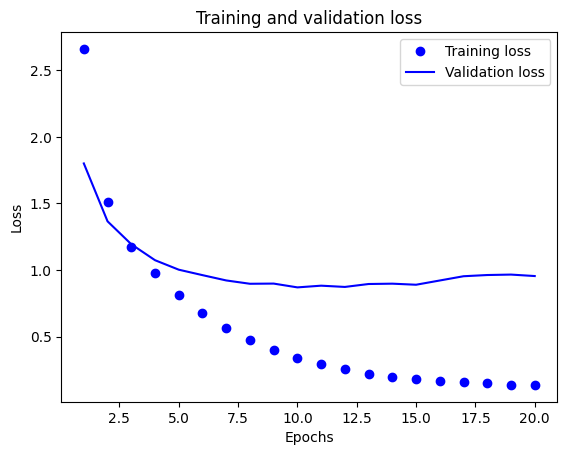

In [60]:
# Plotting the training and validation loss
# import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

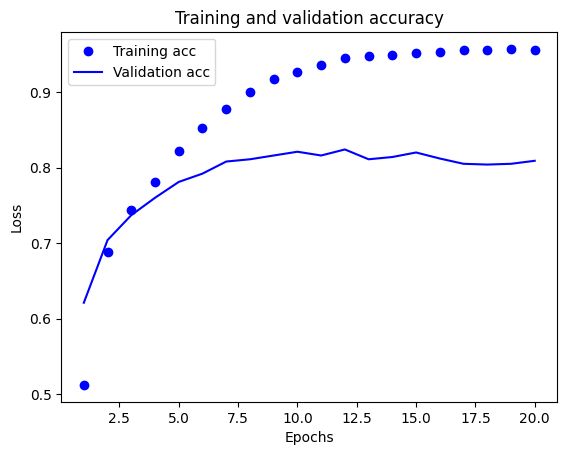

In [62]:
# Plotting the training and validation accuracy
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

The network begins to overfit after nine epochs.

Let's train a new network from scratch for nine epochs

In [63]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax")) # Her sample, 46-dimensional vector verecek

In [64]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 142ms/step - loss: 2.6381 - accuracy: 0.4890 - val_loss: 1.7789 - val_accuracy: 0.6210
Epoch 2/9
16/16 [==============================] - 1s 76ms/step - loss: 1.5133 - accuracy: 0.6753 - val_loss: 1.3893 - val_accuracy: 0.6890
Epoch 3/9
16/16 [==============================] - 1s 85ms/step - loss: 1.1857 - accuracy: 0.7370 - val_loss: 1.2099 - val_accuracy: 0.7220
Epoch 4/9
16/16 [==============================] - 2s 108ms/step - loss: 0.9940 - accuracy: 0.7825 - val_loss: 1.1065 - val_accuracy: 0.7510
Epoch 5/9
16/16 [==============================] - 1s 92ms/step - loss: 0.8342 - accuracy: 0.8180 - val_loss: 1.0425 - val_accuracy: 0.7710
Epoch 6/9
16/16 [==============================] - 1s 71ms/step - loss: 0.7068 - accuracy: 0.8474 - val_loss: 0.9874 - val_accuracy: 0.7830
Epoch 7/9
16/16 [==============================] - 1s 68ms/step - loss: 0.5960 - accuracy: 0.8732 - val_loss: 0.9312 - val_accuracy: 0.8030
Epoch 8/9
16/16 [=

In [65]:
results

[0.9608092308044434, 0.784060537815094]

In [68]:
# import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)
# Bu kod karıştırılmış labellar ile normal labelların ne kadarının eşleştiğini gösterir bu sonuç ile karşılaştırırsak modelimiz pozitif bir sonuç verdi

0.188780053428317

### Generating predictions on new data

In [69]:
# Generating predictions for new data
predictions = model.predict(x_test)
predictions[0].shape # (46,) çünkü 46 sınıf var ve her biri için bir değer hesaplıyor toplamları ise 1 ediyor.

71/71 [==============================] - 1s 8ms/step


(46,)

In [71]:
np.sum(predictions[0])

0.9999998

In [72]:
# Largest entry is the predicted class
np.argmax(predictions[0])

3

In [73]:
# A different way to handle the labels and the loss

y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # categorical_crossentropy için one-hot gerekli fakat sparse olursa tamsayı olması yeterli oluyor
              metrics=["accuracy"])

In [75]:
# A model with an information bottleneck

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 39ms/step - loss: 2.9311 - accuracy: 0.2690 - val_loss: 2.1275 - val_accuracy: 0.4370
Epoch 2/20
63/63 [==============================] - 2s 29ms/step - loss: 1.7720 - accuracy: 0.6067 - val_loss: 1.5790 - val_accuracy: 0.6550
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.3980 - accuracy: 0.6921 - val_loss: 1.4372 - val_accuracy: 0.6730
Epoch 4/20
63/63 [==============================] - 1s 24ms/step - loss: 1.2424 - accuracy: 0.7157 - val_loss: 1.3852 - val_accuracy: 0.6780
Epoch 5/20
63/63 [==============================] - 2s 31ms/step - loss: 1.1417 - accuracy: 0.7323 - val_loss: 1.3704 - val_accuracy: 0.6840
Epoch 6/20
63/63 [==============================] - 2s 33ms/step - loss: 1.0612 - accuracy: 0.7442 - val_loss: 1.3477 - val_accuracy: 0.6960
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 0.9912 - accuracy: 0.7539 - val_loss: 1.3289 - val_accuracy: 0.7030
Epoch 8/20
63

Network peaks at %71 val accuracy

## Predicting house prices: a regression example

The Boston Housing Price dataset

In [80]:
# Loading the Boston housing dataset
# from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [81]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [82]:
train_targets # median values of owner-occuppied homes, in thousands of dollars

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

In [83]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### Building your network


In [84]:
# Model definition

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(1)) # will be linear layer
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [85]:
# Validating your approach using K-fold validation

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print("processing fold #", i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
      axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
      axis=0
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [86]:
all_scores

[1.9306352138519287,
 2.2375714778900146,
 2.6272830963134766,
 2.5665042400360107]

In [87]:
np.mean(all_scores)

2.3404985070228577

In [ ]:
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print("processing fold #", i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
      axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
      axis=0
  )
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)

In [93]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [94]:
mae_history = history.history["val_mae"]
all_mae_histories.append(mae_history)

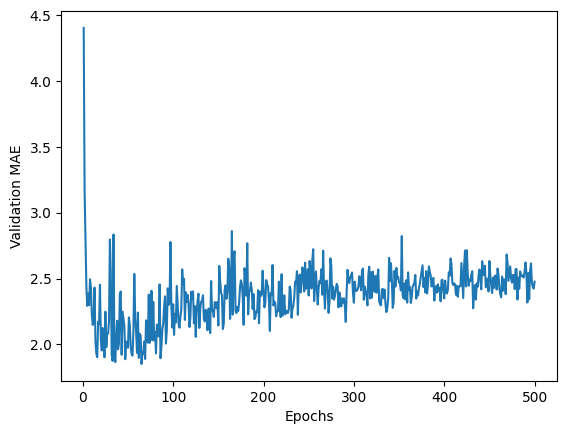

In [95]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

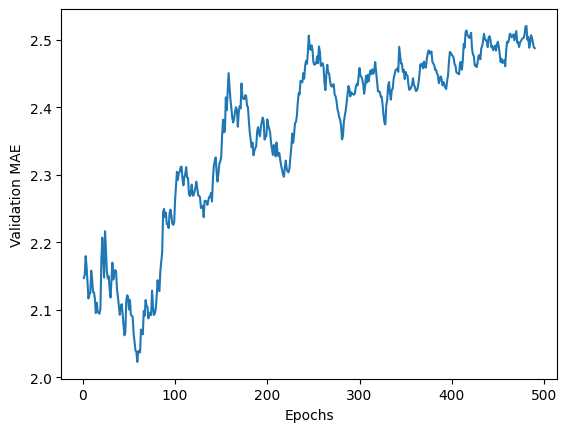

In [96]:
# Plotting validation scores, excluding the first 10 data points

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [97]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 18.4881 - mae: 2.5299


2.529925584793091